In [9]:
# !pip install tensorflow
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory(r'C:\Users\rithv\OneDrive\Desktop\cnn_rnn_models\sca2_dti_cnn\ses1_model_anat\implem')

Found 4137 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

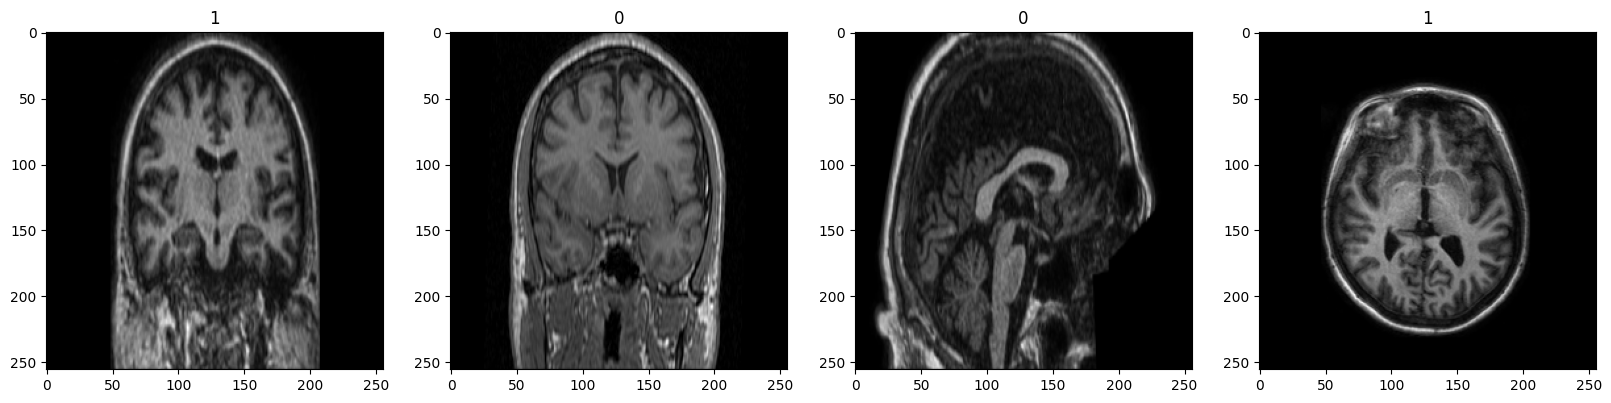

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()


(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

91

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [18]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization


In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(16, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(256, 256, 3), name='conv1'))
model.add(BatchNormalization(name='batch_norm1'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='max_pool1'))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', name='conv2'))
model.add(BatchNormalization(name='batch_norm2'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='max_pool2'))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', name='conv3'))
model.add(BatchNormalization(name='batch_norm3'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='max_pool3'))

model.add(Flatten(name='flatten'))

model.add(Dense(256, activation='relu', kernel_initializer='he_uniform', name='dense1'))
model.add(Dropout(0.5, name='dropout'))

model.add(Dense(1, activation='sigmoid', name='output'))


In [25]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall, AUC

# Configuring the optimizer
optimizer = Adam(learning_rate=0.001)  # You can adjust the learning rate

# Compiling the model with more detailed configuration
model.compile(optimizer=optimizer,
              loss=tf.losses.BinaryCrossentropy(from_logits=False),
              metrics=[BinaryAccuracy(name='accuracy'),
                       Precision(name='precision'),
                       Recall(name='recall'),
                       AUC(name='auc')])

# Optionally, define a learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)


In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 256, 256, 16)      448       
                                                                 
 batch_norm1 (BatchNormaliz  (None, 256, 256, 16)      64        
 ation)                                                          
                                                                 
 max_pool1 (MaxPooling2D)    (None, 128, 128, 16)      0         
                                                                 
 conv2 (Conv2D)              (None, 128, 128, 32)      4640      
                                                                 
 batch_norm2 (BatchNormaliz  (None, 128, 128, 32)      128       
 ation)                                                          
                                                                 
 max_pool2 (MaxPooling2D)    (None, 64, 64, 32)       

In [27]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [28]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30
91/91 [==============================] - 149s 2s/step - loss: 2.4600 - accuracy: 0.8922 - precision: 0.8250 - recall: 0.8269 - auc: 0.9067 - val_loss: 3.4414 - val_accuracy: 0.7812 - val_precision: 1.0000 - val_recall: 0.2891 - val_auc: 0.6758
Epoch 2/30
91/91 [==============================] - 136s 1s/step - loss: 0.0534 - accuracy: 0.9842 - precision: 0.9740 - recall: 0.9740 - auc: 0.9964 - val_loss: 4.5405 - val_accuracy: 0.6899 - val_precision: 1.0000 - val_recall: 0.0337 - val_auc: 0.5375
Epoch 3/30
91/91 [==============================] - 140s 2s/step - loss: 0.0706 - accuracy: 0.9770 - precision: 0.9679 - recall: 0.9559 - auc: 0.9923 - val_loss: 0.8952 - val_accuracy: 0.8858 - val_precision: 0.8894 - val_recall: 0.7311 - val_auc: 0.8599
Epoch 4/30
91/91 [==============================] - 148s 2s/step - loss: 0.0301 - accuracy: 0.9887 - precision: 0.9840 - recall: 0.9784 - auc: 0.9992 - val_loss: 0.0780 - val_accuracy: 0.9627 - val_precision: 0.8913 - val_recall: 0.996

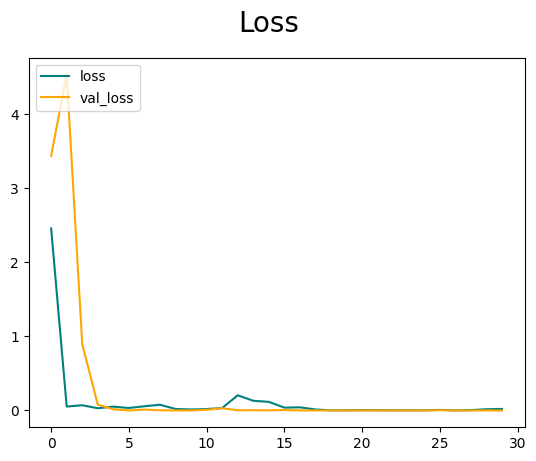

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

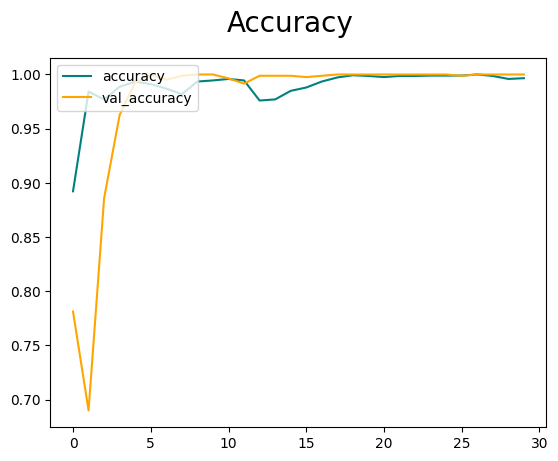

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    predictor = model.predict(X)
    pre.update_state(y, predictor)
    re.update_state(y, predictor)
    acc.update_state(y, predictor)

1/1 [==============================] - 0s 170ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [ ]:
import cv2

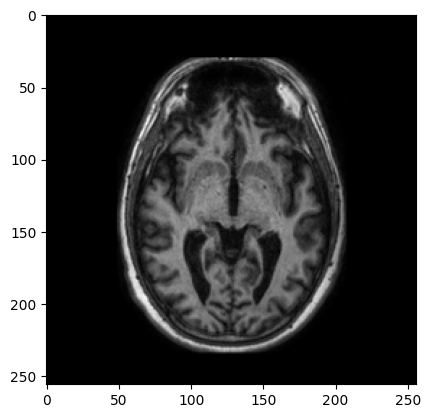

In [ ]:
img = cv2.imread(r'C:\Users\rithv\OneDrive\Desktop\cnn_rnn_models\sca2_dti_cnn\ses1_model_anat\implem\sca2_ses1\ses-01_sub-SCA202_ses-01_T1w.nii_slice_73_axial.png')
plt.imshow(img)
plt.show()

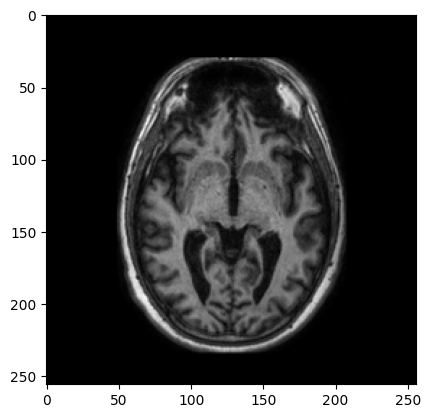

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(256, 256, 3), dtype=float32)


In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

print(resize)

In [ ]:
predictor = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 40ms/step


In [ ]:
predictor

array([[1.]], dtype=float32)

In [ ]:
if predictor > 0.5: 
    print(f'Predicted class is SCA2')
else:
    print(f'Predicted class is healthy')

Predicted class is SCA2


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 256, 256, 16)      448       
                                                                 
 batch_norm1 (BatchNormaliz  (None, 256, 256, 16)      64        
 ation)                                                          
                                                                 
 max_pool1 (MaxPooling2D)    (None, 128, 128, 16)      0         
                                                                 
 conv2 (Conv2D)              (None, 128, 128, 32)      4640      
                                                                 
 batch_norm2 (BatchNormaliz  (None, 128, 128, 32)      128       
 ation)                                                          
                                                                 
 max_pool2 (MaxPooling2D)    (None, 64, 64, 32)       

In [ ]:
import cv2
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from IPython.display import Image, display
import os

In [ ]:
predictor = model.predict(np.expand_dims(resize/255, 0))
predictor
if predictor > 0.5: 
    print(f'Predicted class is SCA2')
else:
    print(f'Predicted class is healthy')

1/1 [==============================] - 0s 42ms/step
Predicted class is SCA2


In [ ]:
resizee = resize.numpy().astype(int)

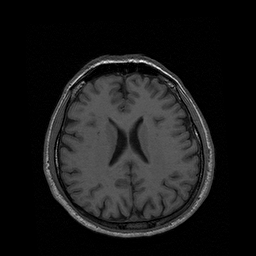

In [ ]:

preprocess_input = tf.keras.applications.xception.preprocess_input
decode_predictions = tf.keras.applications.xception.decode_predictions

img_size = (256, 256)

# img_path = r'C:\Users\rithv\OneDrive\Desktop\cnn_rnn_models\sca2_dti_cnn\ses1_model_anat\test\test2.jpg'

img_path = r'C:\Users\rithv\OneDrive\Desktop\cnn_rnn_models\sca2_dti_cnn\ses1_model_anat\implem\control_ses1\ses-01_sub-control15_ses-01_T1w.nii_slice_98_axial.png'




last_conv_layer_name = 'conv3'

display(Image(img_path))

In [ ]:
def load_img(img_path, size=None):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    img = tf.keras.preprocessing.image.img_to_array(img)
    return img


def get_img_array(img_path, size):
    img_array = load_img(img_path, size)
    # We add a dimension to transform our array into a 'batch'
    # of size (1, 299, 299, 3)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


def get_preprocessed_img(img_path, size):
    img_array = get_img_array(img_path, size)
    return preprocess_input(img_array)

In [ ]:
def generate_cam(img_array, model, last_conv_layer_name, pred_index=None, respond=False):
    """
    Generates a Class Activation Map (CAM) for a given image and model.

    Args:
        img_array (numpy.array): The input image in array format.
        model (tf.keras.Model): The trained model.
        last_conv_layer_name (str): The name of the last convolutional layer.
        pred_index (int, optional): Index of the predicted class. Defaults to None.
        respond (bool, optional): Whether to use Respond-CAM. Defaults to False.

    Returns:
        numpy.array: The generated heatmap as an array.
    """
    # Creating a model that maps the input image to the activations
    try:
        grad_model = tf.keras.models.Model(
            [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
        )
    except ValueError as e:
        raise ValueError("Invalid last_conv_layer_name: " + str(e))

    # Computing the gradient
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    conv_outputs = conv_outputs[0]

    if respond:
        # Calculation for Respond-CAM
        respond_weights = np.sum(conv_outputs * grads, axis=(0, 1, 2)) / \
            (np.sum(conv_outputs + 1e-10, axis=(0, 1, 2)))
        heatmap = conv_outputs * respond_weights
    else:
        # Default HiResCAM calculation
        heatmap = conv_outputs * grads

    heatmap = np.sum(heatmap, axis=-1)
    heatmap = tf.squeeze(heatmap)

    # Normalizing the heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


1/1 [==============================] - 0s 33ms/step
Predicted: [[0.]]


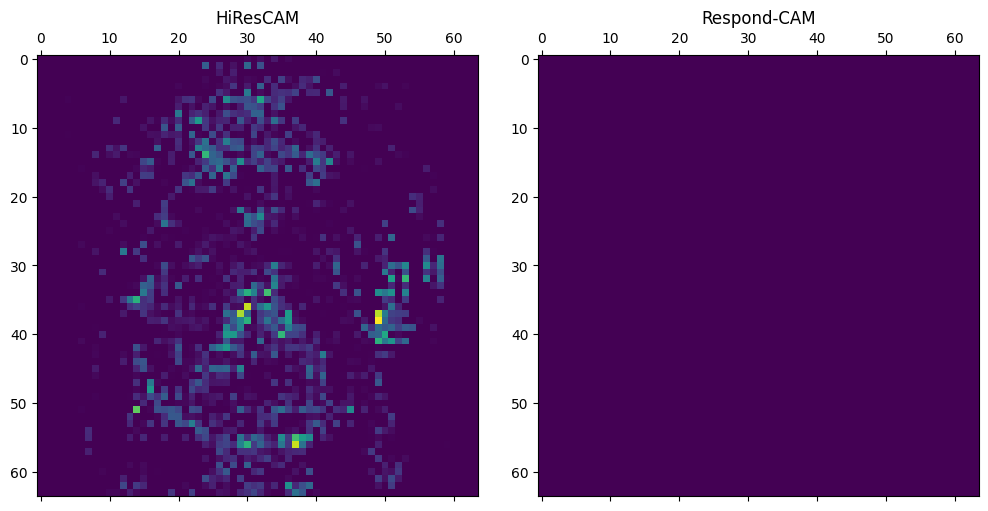

In [ ]:
img_array = get_preprocessed_img(img_path, size=img_size)

model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print('Predicted:', preds)

# Generate class activation heatmap
heatmap = generate_cam(img_array, model, last_conv_layer_name)
respond_heatmap = generate_cam(
    img_array, model, last_conv_layer_name, respond=True)

# Display heatmap
fig = plt.figure(constrained_layout=True, figsize=(10, 5))
axes = fig.subplots(1, 2)

axes[0].set_title('HiResCAM')
axes[0].matshow(heatmap)
axes[1].set_title('Respond-CAM')
axes[1].matshow(respond_heatmap)
plt.show()

In [70]:
def resize_heatmap(img_path, heatmap):
    # Load the original image
    img = load_img(img_path)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap('jet')

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    return jet_heatmap

In [71]:
resized_heatmap = resize_heatmap(img_path, heatmap)
resized_respond_heatmap = resize_heatmap(img_path, respond_heatmap)

C:\Users\rithv\AppData\Local\Temp\ipykernel_1627852\3870767909.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap('jet')


In [72]:
def visualize_side_by_side(hirescam_img, respondcam_img):
    fig = plt.figure(constrained_layout=True, figsize=(20, 10))
    axes = fig.subplots(1, 2)

    axes[0].set_title('HiResCAM')
    axes[0].imshow(hirescam_img)
    axes[1].set_title('Respond-CAM')
    axes[1].imshow(respondcam_img)
    plt.show()

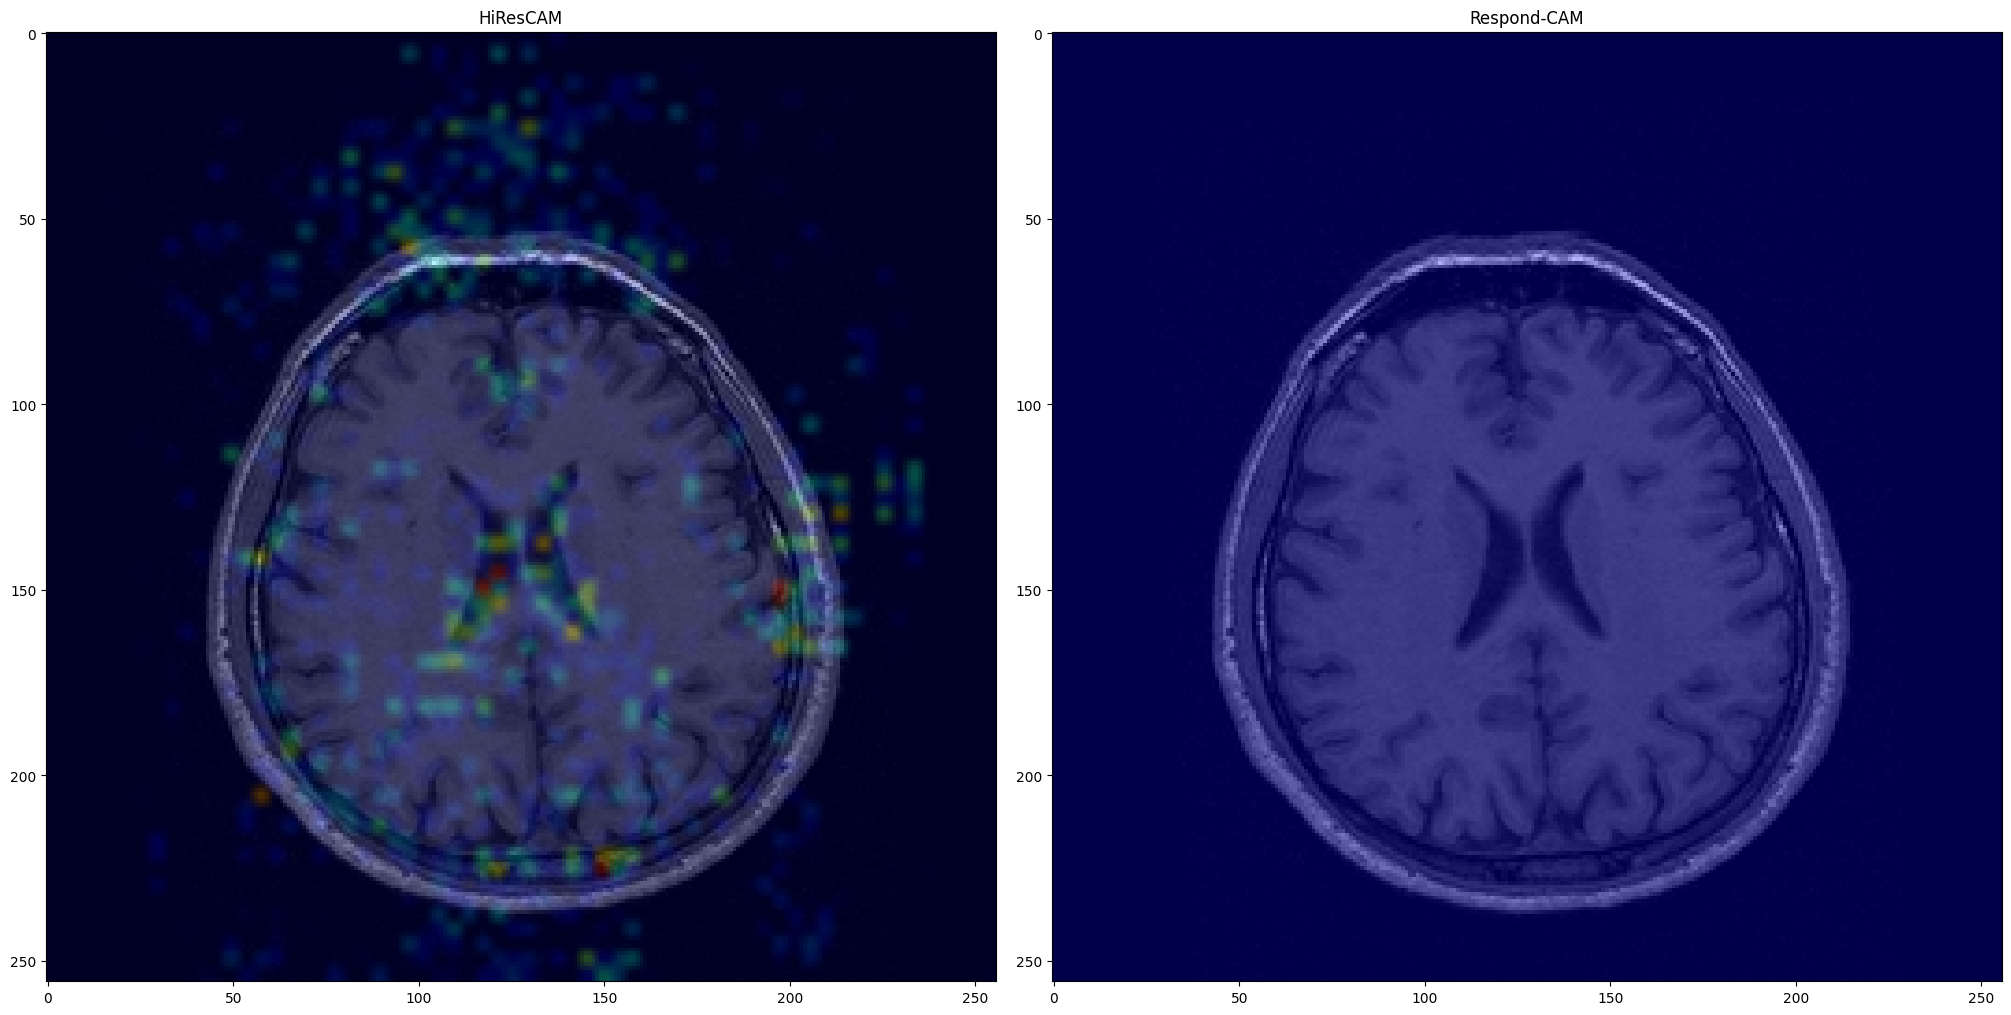

In [73]:
def superimpose_heatmap(img, heatmap, alpha=0.4):
    superimposed_img = heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(
        superimposed_img)

    return superimposed_img


original_img = load_img(img_path)
superimposed_img = superimpose_heatmap(original_img, resized_heatmap)
superimposed_respond_img = superimpose_heatmap(
    original_img, resized_respond_heatmap)

visualize_side_by_side(superimposed_img, superimposed_respond_img)

In [74]:
# # model.save('advmodelnov19.keras')


# # Save model weights
# model.save_weights('advmodelnov19_weights.h5')

# # Save model architecture
# with open('advmodelnov19_architecture.json', 'w') as f:
#     f.write(model.to_json())
